In this notebook we present the calculation process for all theoratical results presented in Table 1, Figure 4, Figure 5, and Figure 6.  We also present the calculation process for calculting $S_\wp$ (Sec. 5.3).

**Theorem:** In a $N$-node system with $f = G\cdot N$ adversarial nodes, where $0 < G < 0.5$, the probability of having $t \leq S\cdot M$ adversarial nodes ($G < S < 1$) in any randomly formed shard of $M$ nodes is guaranteed to be greater than or equal to $1 - 10^{-b}$, where $b$ is a positive integer representing the desired level of security. The shard size $M$ must satisfy the inequality: $M \geq \frac{G(1 - G)}{\left(\frac{S - G}{z}\right)^2}$,  
where $z$ is the standard score corresponding to the cumulative probability $1-\frac{ 10^{-b}}{Ns}$, $Ns$ is the number of shards in the system.

**Prof:** Let $p$ be the probability of a randomly chosen node in the system being an adversarial node. Since there are $f$ adversarial nodes out of $N$ total nodes, we have $p = \frac{f}{N} = G$.

In a randomly formed shard of size $M$, the probability of having an adversarial node in the shard is still $p = G$. We can model the number of adversarial nodes in the shard using a binomial distribution with parameters $M$ and $p$. To guarantee that there are at most $t=S\cdot M$ adversarial nodes in any shard with a probability greater than or equal to $1 - 10^{-b}$, we need to find the minimum shard size $M$ that satisfies this condition. Using the cumulative distribution function (CDF) of the binomial distribution, we have:
$P(k \leq t) = \sum_{k=0}^{t} \binom{M}{k} p^k (1 - p)^{M - k} \geq 1 - 10^{-b} $.

where $k$ follows a binomial distribution with parameters $M$ and $p$. However, this inequality only calculates the probability for a particular shard to meet the condition. To calculate the probability for any shard to meet the condition at the same time, we have a loose bound
 $P(k \leq t) = \sum_{k=0}^{t} \binom{M}{k} p^k (1 - p)^{M - k} \geq (1-\frac{10^{-b}}{N_s}) $ where $Ns$ is the number of shards in the system.

By applying this approximation, we can rewrite the inequality as $\text{CDF}\left(\frac{t - \mu}{\sigma}\right) \geq (1-\frac{10^{-b}}{N_s})$ apparently it should satisfy $t-\mu\geq 0$.

Substituting the values of $\mu = M \cdot p = M \cdot G$ and $\sigma = \sqrt{M \cdot p (1 - p)} = \sqrt{M \cdot G (1 - G)}$, we get: $\text{CDF}\left(\frac{t - M \cdot G}{\sqrt{M \cdot G (1 - G)}}\right) \geq (1-\frac{10^{-b}}{N_s}).$

Let $z$ be the standard score such that $\text{CDF}(z) = (1-\frac{10^{-b}}{N_s})$. In other words, $z$ is the value such that the cumulative probability up to $z$ is equal to $(1-\frac{10^{-b}}{N_s})$.
Solving for $z$, we have:$z = \text{CDF}^{-1}(1-\frac{10^{-b}}{N_s})$.

Thus, for the theorem to hold, the shard size $M$ should satisfy the inequality:
$ M \geq \frac{G(1 - G)}{\left(\frac{S - G}{z}\right)^2}$. Hence, the probability of having at most $t = S\cdot M$ adversarial nodes in a randomly formed shard of $M$ nodes is guaranteed to be greater than or equal to $1 - 10^{-b}$ if $M$ satisfies the inequality.

# Table 1:

Below we present the code for calculating minimum shard size (M) and the correspondingly, the maximum shard number (Ns). The results are used in Table.1.

In [1]:
import scipy.optimize as optimize
import math
import scipy.stats as stats

def calculate_shard_size(N, G, S, b, Ns):
    # Calculate p (probability of adversarial node in the system)
    p = G

    # Calculate the standard score 'z'
    cumulative_prob = 1 - 10**(-b) / Ns
    z = stats.norm.ppf(cumulative_prob)

    # Calculate the shard size M
    M = (G * (1 - G)) / ((S - G) / z)**2

    return M

In [2]:
import scipy.stats as stats
import math

def find_min_M_by_enumerating(N, G, S, b):
    # Starting from the maximum possible Ns, which is N (each node is its own shard)
    last_fulfill=0
    for Ns in range(1,int(N/5)):
        # Calculate M for the current Ns
        M = N // Ns

        # Calculate z based on the current Ns
        cumulative_prob = 1-(10**(-b)) / Ns
        z = stats.norm.ppf(cumulative_prob)
        if S==-1:
            S=(M-1)/M
        elif S==-2:
            S=((M-1)/2)/M
        elif S==-3:
            S=((M-1)/3)/M

        # Calculate the minimum required M based on the shard security condition
        Min_M_required = G * (1 - G) / (((S - G) / z)**2)
        # Check if the calculated M meets the required M
        # print (Ns,M, Min_M_required)
        if M >=int(Min_M_required):
            last_fulfill=M
        if M < Min_M_required:
            if last_fulfill!=0:
                return M
    # If no valid Ns is found, return 0 or an error message
    return N

# RapidChain:
N = 5000
G = int((N-1)/3)/N
b = 7
M = find_min_M_by_enumerating(N, G, -2, b)
print("RapidChain, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)
# Omniledger:
N = 5000
G = int((N-1)/4)/N
b = 7
M = find_min_M_by_enumerating(N, G, -3, b)
print("Omniledger, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)
# Gearbox - S= 0.89:
N = 5000
G = int((N-1)/2)/N
b = 7
M = find_min_M_by_enumerating(N, G,0.89 , b)
print("Gearbox - 89% Gear, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)
# Gearbox - S= 0.49:
N = 5000
G = int((N-1)/2)/N
b = 7
M = find_min_M_by_enumerating(N, G,0.49 , b)
print("Gearbox - 49% Gear, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)
# Reticulum:
N = 5000
G = int((N-1)/3)/N
b = 7
M = find_min_M_by_enumerating(N, G,-1 , b)
print("Reticulum, Maximum Ns:",  N//M, ", Minimum N_p:", M, ",Transaction per epoch:", N//M*4096)
# Ws
N = 5000
G = int((N-1)/3)/N
b = 7
M = find_min_M_by_enumerating(N, G,-1 , b)
print("WaveSprader f<=(N-1)/3, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)
# Ws
N = 5000
G = int((N-1)/2)/N
b = 7
M = find_min_M_by_enumerating(N, G,-1 , b)
print("WaveSprader f<=(N-1)/2, Maximum Ns:",  N//M, ", Minimum M:", M, ",Transaction per epoch:", N//M*4096)

RapidChain, Maximum Ns: 20 , Minimum M: 250 ,Transaction per epoch: 81920
Omniledger, Maximum Ns: 7 , Minimum M: 714 ,Transaction per epoch: 28672
Gearbox - 89% Gear, Maximum Ns: 86 , Minimum M: 58 ,Transaction per epoch: 352256
Gearbox - 49% Gear, Maximum Ns: 1 , Minimum M: 5000 ,Transaction per epoch: 4096
Reticulum, Maximum Ns: 277 , Minimum N_p: 18 ,Transaction per epoch: 1134592
WaveSprader f<=(N-1)/3, Maximum Ns: 277 , Minimum M: 18 ,Transaction per epoch: 1134592
WaveSprader f<=(N-1)/2, Maximum Ns: 138 , Minimum M: 36 ,Transaction per epoch: 565248


# Figure 4: 
Below we show the relationship between $\tau$ liveness guarantee and $f_{run}$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


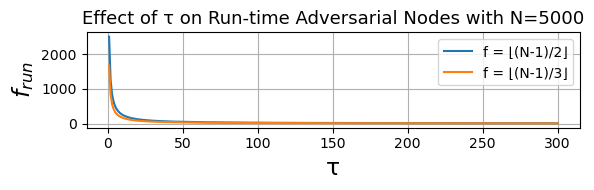

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions for f
def f1(N):
    return (N-1)//2

def f2(N):
    return (N-1)//3

# Set N value
N = 5000

# Generate values for τ
tau_values = np.arange(1, 301)

# Generate plots for both functions
plt.figure(figsize=(6, 2))
for f_function, label in zip([f1, f2], ["f = ⌊(N-1)/2⌋", "f = ⌊(N-1)/3⌋"]):
    f_values = [f_function(N)] * len(tau_values)
    f_run_values = [f_value // tau for f_value, tau in zip(f_values, tau_values)]
    plt.plot(tau_values, f_run_values, label=label)

plt.xlabel('τ', fontsize=17)
plt.ylabel(r'$f_{run}$', fontsize=17)
plt.title('Effect of τ on Run-time Adversarial Nodes with N=5000', fontsize=13)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("tau_N.eps")
plt.show()


# Figure 5: 
Below we show the probablity of activating C adjacent waves.


In [28]:
import math
import multiprocessing
from itertools import product
import math
import multiprocessing
from itertools import product
from scipy.stats import norm

# Precompute constant values
def precompute_probabilities(M, f, N, C):
    probabilities = {}
    for k in range(C + 1):
        probabilities[k] = calculate_probability(M, f, N, k)
    return probabilities

def calculate_h(w, N, z, wp, M):
    h_min = 50001
    h_max = 100000

    for h in range(h_min + 1, h_max):
        WS = w * (1 - w) / ((h / 100000 - w) / z) ** 2
        if WS <= wp * M:
            return h / 100000

    return (M-1)/M

def calculate_probability(M, f, N, k):
    binomial_coefficient = math.comb(M, k)
    prob_adversarial = (f / N) ** k
    prob_honest = (1 - f / N) ** (M - k)
    probability = binomial_coefficient * prob_adversarial * prob_honest
    return probability

def calculate_wave_probability(M, f, N, C):
    dp = [[0.0] * (C + 1) for _ in range(C * M + 1)]
    dp[0][0] = 1.0

    for wp in range(1, C + 1):
        for k in range(min(f,int(thresholds[wp - 1]*M*wp)+1), min(f,wp* (M-1) + 1)):
            combination_probability = 0.0
            if wp==1:
                combination_probability = calculate_probability(M, f, N, k)
            else:
                for j in range(1,M):
                    combination_probability += calculate_probability(M, f, N, j) * dp[k - j][wp - 1]
            dp[k][wp] = combination_probability

    total_probability = 0.0
    for k in range(min(f,int(thresholds[C - 1]*M*C)+1),min(f, (M-1)*C+1)):
        total_probability += dp[k][C]
#        print (C,k,dp[k][C])
    return total_probability

N = 5000
C = 70   # Number of adjacent waves
f = int((N-1)/3)  # Some value
G = f/N   # Proportion of adversarial nodes -> change to G = int((N-1)/2)/N to see the result for N/2 version.
b = 7
M = find_min_M_by_enumerating(N, G,-1 , b)
Ns = N//M
z = norm.ppf(1 - (10 ** (-b))/Ns)  # Define the value of z
w = G  # Define the value of w (f divided by N)

M1 = M
S = [calculate_h(w, N, z, wp, M) for wp in range(1, C + 1)]  # List of S values
thresholds = [max(0, ((1 - S[wp - 1]) * M*wp - 1) / (M*wp)) for wp in range(1, C + 1)]  # List of L values

CC=[]
PP=[]
for c in range (1,C+1):
    probability=calculate_wave_probability(M, f, N, c)
    print(f"M={M}. C={c}. L={max(0,((1 - S[c - 1]) * M - 1)) / M}. The probability of all adjacent waves to lose liveness is: {probability}")
    CC.append(c)
    PP.append(probability)

M=18. C=1. L=2.4671622769447922e-17. The probability of all adjacent waves to lose liveness is: 0.9993209179051501
M=18. C=2. L=0.12721444444444444. The probability of all adjacent waves to lose liveness is: 0.9916000310733235
M=18. C=3. L=0.21603444444444442. The probability of all adjacent waves to lose liveness is: 0.9037962487738861
M=18. C=4. L=0.26898444444444447. The probability of all adjacent waves to lose liveness is: 0.6380057014337344
M=18. C=5. L=0.30511444444444447. The probability of all adjacent waves to lose liveness is: 0.3578210286941116
M=18. C=6. L=0.33179444444444445. The probability of all adjacent waves to lose liveness is: 0.17152438205803403
M=18. C=7. L=0.3525244444444444. The probability of all adjacent waves to lose liveness is: 0.05363340790919088
M=18. C=8. L=0.3692244444444445. The probability of all adjacent waves to lose liveness is: 0.013934767822602261
M=18. C=9. L=0.3830744444444444. The probability of all adjacent waves to lose liveness is: 0.00320

In [13]:
C = 70   # Number of adjacent waves
N = 5000
f = int((N-1)/2)  # Some value
G = f/N   # Proportion of adversarial nodes -> change to G = int((N-1)/2)/N to see the result for N/2 version.
b = 7
M = find_min_M_by_enumerating(N, G,-1 , b)
Ns = N//M
z = norm.ppf(1 - (10 ** (-b))/Ns)  # Define the value of z
w = G  # Define the value of w (f divided by N)

M1 = M
S = [calculate_h(w, N, z, wp, M) for wp in range(1, C + 1)]  # List of S values
thresholds = [max(0, ((1 - S[wp - 1]) * M*wp - 1) / (M*wp)) for wp in range(1, C + 1)]  # List of L values

CC1=[]
PP1=[]
for c in range (1,C+1):
    probability=calculate_wave_probability(M, f, N, c)
    print(f"M={M}. C={c}. L={max(0,((1 - S[c - 1]) * M - 1)) / M}. The probability of all adjacent waves to lose liveness is: {probability}")
    CC1.append(c)
    PP1.append(probability)

M=36. C=1. L=1.2335811384723961e-17. The probability of all adjacent waves to lose liveness is: 0.9999999999708931
M=36. C=2. L=0.11592222222222226. The probability of all adjacent waves to lose liveness is: 0.9999999999204796
M=36. C=3. L=0.18134222222222218. The probability of all adjacent waves to lose liveness is: 0.9999999998413533
M=36. C=4. L=0.22034222222222224. The probability of all adjacent waves to lose liveness is: 0.9999999997382958
M=36. C=5. L=0.24695222222222224. The probability of all adjacent waves to lose liveness is: 0.9999999995706581
M=36. C=6. L=0.26659222222222223. The probability of all adjacent waves to lose liveness is: 0.9999999994009638
M=36. C=7. L=0.28186222222222224. The probability of all adjacent waves to lose liveness is: 0.9999999991056396
M=36. C=8. L=0.2941722222222222. The probability of all adjacent waves to lose liveness is: 0.9999999989362205
M=36. C=9. L=0.3043622222222222. The probability of all adjacent waves to lose liveness is: 0.99999999

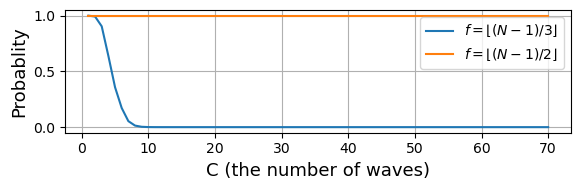

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Figure 1
p = 1e-7
plt.figure(figsize=(6, 2))
plt.plot(CC, PP,label=r"$f=\lfloor (N-1)/3\rfloor$")
plt.plot(CC1, PP1,label=r"$f=\lfloor (N-1)/2\rfloor$")

plt.xlabel('C (the number of waves)', fontsize=13)
plt.ylabel('Probablity', fontsize=13)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("2.pdf")

# Figure 6: 
Calualte the upper and lower bounds of the control block size with different N

In [15]:
import numpy as np
import matplotlib.pyplot as plt

p = 1e-7
N_values = np.arange(200, 10001,10)
G0 = [int((N-1)/3)/N for N in N_values]   # Proportion of adversarial nodes
G1 = [int((N-1)/2)/N for N in N_values]   # Proportion of adversarial nodes
b = 7
M_values_G0 = [find_min_M_by_enumerating(N, G0[i],-1 , b) for i, N in enumerate (N_values)]
M_values_G1 = [find_min_M_by_enumerating(N, G1[i],-1 , b) for i, N in enumerate (N_values)]

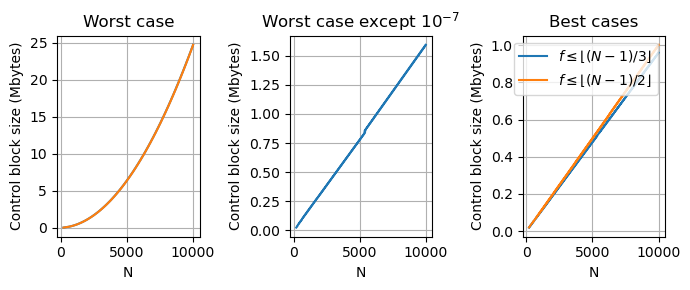

In [34]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 3, 1)
result0=[]
result1=[]
for i, N in enumerate (N_values):
    M0=M_values_G0[i]
    M1=M_values_G1[i]
    NS0 = N_values[i] // M0
    NS1 = N_values[i] // M1
    result0.append(NS0 * (M0 * ((2 * N_values [i]/ 8) +  96)) / 1024 / 1024)
    result1.append(NS1 * (M1 * ((2 *  N_values [i] / 8) +  96)) / 1024 / 1024)
plt.plot(N_values, result0, label="Partially Sync")
plt.plot(N_values, result1, label="Sync")
plt.xlabel('N')
plt.ylabel('Control block size (Mbytes)')
plt.title(r'Worst case')
plt.grid(True)

plt.subplot(1, 3, 2)
result=[]
b = 7
C=70
for i, N in enumerate (N_values):
    f = int((N_values[i]-1)/3)  # Some value
    G = f/N_values[i]   # Proportion of adversarial nodes -> change to G = int((N-1)/2)/N to see the result for N/2 version.
    M = M_values_G0[i]
    cc=1
    for c in range (1,C+1):
        probability=calculate_wave_probability(M, f, N_values[i], c)
        if probability<10**(-b):
            cc=c
            break
    NS = N_values[i] // M_values_G0[i]
    result.append (NS * (M_values_G0[i] * ((2 * M_values_G0[i]*cc / 8) + 96)) / 1024 / 1024)
plt.plot(N_values, result)
plt.xlabel('N')
plt.ylabel('Control block size (Mbytes)')
plt.title(r'Worst case except $10^{-7}$')
plt.grid(True)
# Figure 2

plt.subplot(1, 3, 3)
result0=[]
result1=[]
for i, N in enumerate (N_values):
    NS = N_values[i] // M_values_G0[i]
    result0.append (NS * (M_values_G0[i] * ((2 * M_values_G0[i] / 8) + 96)) / 1024 / 1024)
    NS = N_values[i] // M_values_G1[i]
    result1.append (NS * (M_values_G1[i] * ((2 * M_values_G1[i] / 8) + 96)) / 1024 / 1024)
plt.plot(N_values, result0, label=r"$f\leq \lfloor (N-1)/3 \rfloor$" )
plt.plot(N_values, result1, label=r"$f\leq \lfloor (N-1)/2 \rfloor$" )

plt.xlabel('N')
plt.title(r"Best cases")
plt.legend()
plt.ylabel('Control block size (Mbytes)')

plt.grid(True)
plt.tight_layout()
plt.savefig("size.pdf")
plt.show()


# Calculate $S_\wp$

In [35]:
import scipy.optimize as optimize
import math
import scipy.stats as stats

# Define the function to find the difference between calculated M and desired M
def difference(S, N, G, b, Ns, desired_M):
    # Calculate the shard size M using the corrected formula
    p = G
    cumulative_prob = 1 - 10**(-b) / Ns
    z = stats.norm.ppf(cumulative_prob)

    # Avoid division by zero by using a small epsilon
    epsilon = 1e-10
    if S == G:
        S += epsilon

    calculated_M = (G * (1 - G)) / ((S - G) / z) ** 2

    # Calculate the difference between calculated M and desired M
    return calculated_M - desired_M

# Constraint function for G < S < 1
def constraint(S):
    return S - G

# Fixed parameters
N = 5000  # Total number of nodes
G = int((N-1)/3)/N   # Proportion of adversarial nodes -> change to G = int((N-1)/2)/N to see the result for N/2 version.
b = 7     # Desired level of security
M = find_min_M_by_enumerating(N, G,-1 , b)  # Number of shards in the system
Ns = N//M
# Function to calculate shard size M
def calculate_shard_size(N, G, S, b, Ns):
    p = G
    cumulative_prob = 1 - 10**(-b) / Ns
    z = stats.norm.ppf(cumulative_prob)
    return (G * (1 - G)) / ((S - G) / z) ** 2

# Loop over desired M values
for waveSize in range(M + M, N + M, M):
    if waveSize > N :
        waveSize = N
    try:
        # Use brentq to find the S that results in M very close to the desired M
        optimal_S = optimize.brentq(difference, G + 1e-5, 1 - 1e-5, args=(N, G, b, Ns, waveSize), xtol=1e-5, rtol=1e-5)

        calculated_M = calculate_shard_size(N, G, optimal_S, b, Ns)

        print(f"The exact or very close solution for achieving waveSize={waveSize} is: {optimal_S}")
        print(f"The calculated waveSize for the optimal S is: {calculated_M}")
    except ValueError as e:
        print(f"Could not find a solution for waveSize={waveSize}: {e}")


The exact or very close solution for achieving waveSize=36 is: 0.8172199758095463
The calculated waveSize for the optimal S is: 36.000011745725935
The exact or very close solution for achieving waveSize=54 is: 0.7284009521122264
The calculated waveSize for the optimal S is: 53.99993651958481
The exact or very close solution for achieving waveSize=72 is: 0.6754538608470775
The calculated waveSize for the optimal S is: 72.00000088826692
The exact or very close solution for achieving waveSize=90 is: 0.6393211754996833
The calculated waveSize for the optimal S is: 89.9999916238812
The exact or very close solution for achieving waveSize=108 is: 0.6126491045171606
The calculated waveSize for the optimal S is: 108.00000339910609
The exact or very close solution for achieving waveSize=126 is: 0.5919195136800827
The calculated waveSize for the optimal S is: 126.00008592554549
The exact or very close solution for achieving waveSize=144 is: 0.5752096085079633
The calculated waveSize for the optim

The exact or very close solution for achieving waveSize=1494 is: 0.40833451616137023
The calculated waveSize for the optimal S is: 1493.9987206852613
The exact or very close solution for achieving waveSize=1512 is: 0.40788597663251047
The calculated waveSize for the optimal S is: 1511.9975409651574
The exact or very close solution for achieving waveSize=1530 is: 0.40744539754126147
The calculated waveSize for the optimal S is: 1529.9954515715776
The exact or very close solution for achieving waveSize=1548 is: 0.40701256015909276
The calculated waveSize for the optimal S is: 1547.991871485537
The exact or very close solution for achieving waveSize=1566 is: 0.40658726128817896
The calculated waveSize for the optimal S is: 1565.9859175265603
The exact or very close solution for achieving waveSize=1584 is: 0.4061693150974264
The calculated waveSize for the optimal S is: 1583.9762804919874
The exact or very close solution for achieving waveSize=1602 is: 0.4057585555900325
The calculated wav

The exact or very close solution for achieving waveSize=2520 is: 0.39105126805762586
The calculated waveSize for the optimal S is: 2520.016869733407
The exact or very close solution for achieving waveSize=2538 is: 0.3908457491824284
The calculated waveSize for the optimal S is: 2538.0176510307365
The exact or very close solution for achieving waveSize=2556 is: 0.39064240529385214
The calculated waveSize for the optimal S is: 2556.01842400535
The exact or very close solution for achieving waveSize=2574 is: 0.39044119833611485
The calculated waveSize for the optimal S is: 2574.0191852398393
The exact or very close solution for achieving waveSize=2592 is: 0.39024209117955083
The calculated waveSize for the optimal S is: 2592.019931305501
The exact or very close solution for achieving waveSize=2610 is: 0.3900450475915664
The calculated waveSize for the optimal S is: 2610.0206587868815
The exact or very close solution for achieving waveSize=2628 is: 0.389850032208695
The calculated waveSize

The exact or very close solution for achieving waveSize=3600 is: 0.3815993984155838
The calculated waveSize for the optimal S is: 3600.387842586698
The exact or very close solution for achieving waveSize=3618 is: 0.381478535381405
The calculated waveSize for the optimal S is: 3618.4372092018907
The exact or very close solution for achieving waveSize=3636 is: 0.3813585858287658
The calculated waveSize for the optimal S is: 3636.484684663386
The exact or very close solution for achieving waveSize=3654 is: 0.3812464443529839
The calculated waveSize for the optimal S is: 3653.4797681806467
The exact or very close solution for achieving waveSize=3672 is: 0.3811282864493983
The calculated waveSize for the optimal S is: 3671.515865991611
The exact or very close solution for achieving waveSize=3690 is: 0.3810110076808533
The calculated waveSize for the optimal S is: 3689.5501636441113
The exact or very close solution for achieving waveSize=3708 is: 0.3808945969650247
The calculated waveSize fo

The exact or very close solution for achieving waveSize=4680 is: 0.37565226840551236
The calculated waveSize for the optimal S is: 4679.801269534013
The exact or very close solution for achieving waveSize=4698 is: 0.3755706142773644
The calculated waveSize for the optimal S is: 4697.855919128795
The exact or very close solution for achieving waveSize=4716 is: 0.3754894784416149
The calculated waveSize for the optimal S is: 4715.899656150248
The exact or very close solution for achieving waveSize=4734 is: 0.3754088504983132
The calculated waveSize for the optimal S is: 4733.933620548905
The exact or very close solution for achieving waveSize=4752 is: 0.3753287201011343
The calculated waveSize for the optimal S is: 4751.958983394525
The exact or very close solution for achieving waveSize=4770 is: 0.37524907695738385
The calculated waveSize for the optimal S is: 4769.976946793874
The exact or very close solution for achieving waveSize=4788 is: 0.375167805067161
The calculated waveSize for